In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve


In [2]:
import zipfile
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('/Users/aimaldastagirzada/Downloads/train/train.csv')

# Load the test dataset
test_data = pd.read_csv('/Users/aimaldastagirzada/Downloads/test/test.csv')

# Example: Display the first few rows of the training dataset
print(train_data.head())

# Example: Display the first few rows of the test dataset
print(test_data.head())


   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure   
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3  \
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary   
0       0.00              2        1.0             0.0        181449.97  \
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4 

In [3]:
train_data.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Initial descriptive statistics ##

In [4]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


1. CreditScore: Ranges from 350 to 850, with a mean of around 656.
2. Age: Ranges from 18 to 92 years, with an average age of approximately 38 years.
3. Tenure: Ranges from 0 to 10 years, with an average tenure of 5 years.
4. Balance: Ranges from 0 to about 250,898, with many customers having a balance of 0 (indicated by the 50th percentile being 0).
5. NumOfProducts: Customers typically have 1 to 2 products from the bank.
6. HasCrCard: About 75% of customers have a credit card.
7. IsActiveMember: Close to 50% of customers are active members.
8. EstimatedSalary: A wide range of salaries, with a mean of approximately 112,575.
9. Exited (Target Variable): About 21% of customers have exited.

- 10. Outliers : There seems to be some outliers in the Age, CreditScore and EstimatedSalary. We will look further into this.

# Data Cleaning 

In [6]:
# Checking for missing values in the dataset
missing_values = train_data.isnull().sum()
missing_values

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

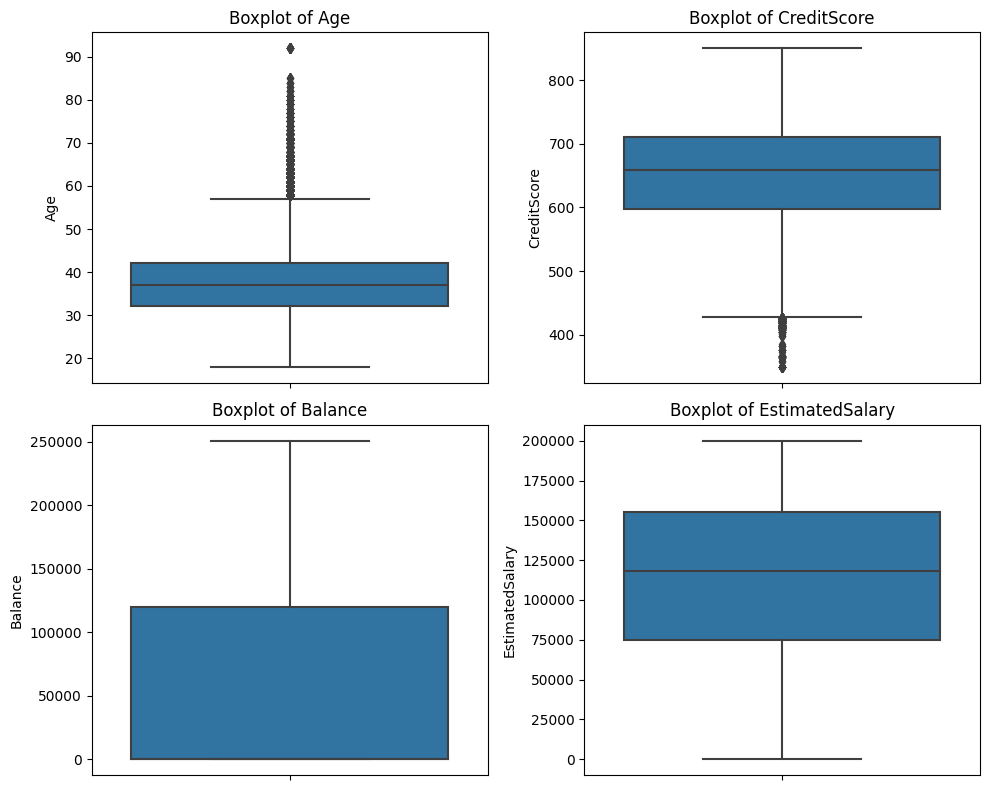

In [7]:
# Creating vertical boxplots for continuous variables
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.boxplot(y=train_data['Age']).set_title('Boxplot of Age')

plt.subplot(2, 2, 2)
sns.boxplot(y=train_data['CreditScore']).set_title('Boxplot of CreditScore')

plt.subplot(2, 2, 3)
sns.boxplot(y=train_data['Balance']).set_title('Boxplot of Balance')

plt.subplot(2, 2, 4)
sns.boxplot(y=train_data['EstimatedSalary']).set_title('Boxplot of EstimatedSalary')

plt.tight_layout()
plt.show()

In [8]:
#Dropping Records with age above 90 (Outliers)
train_data = train_data[train_data['Age'] < 90]


In [9]:
train_data.drop_duplicates(inplace=True)

## Eploratory Data Analysis

In [10]:
sns.set(style="whitegrid")


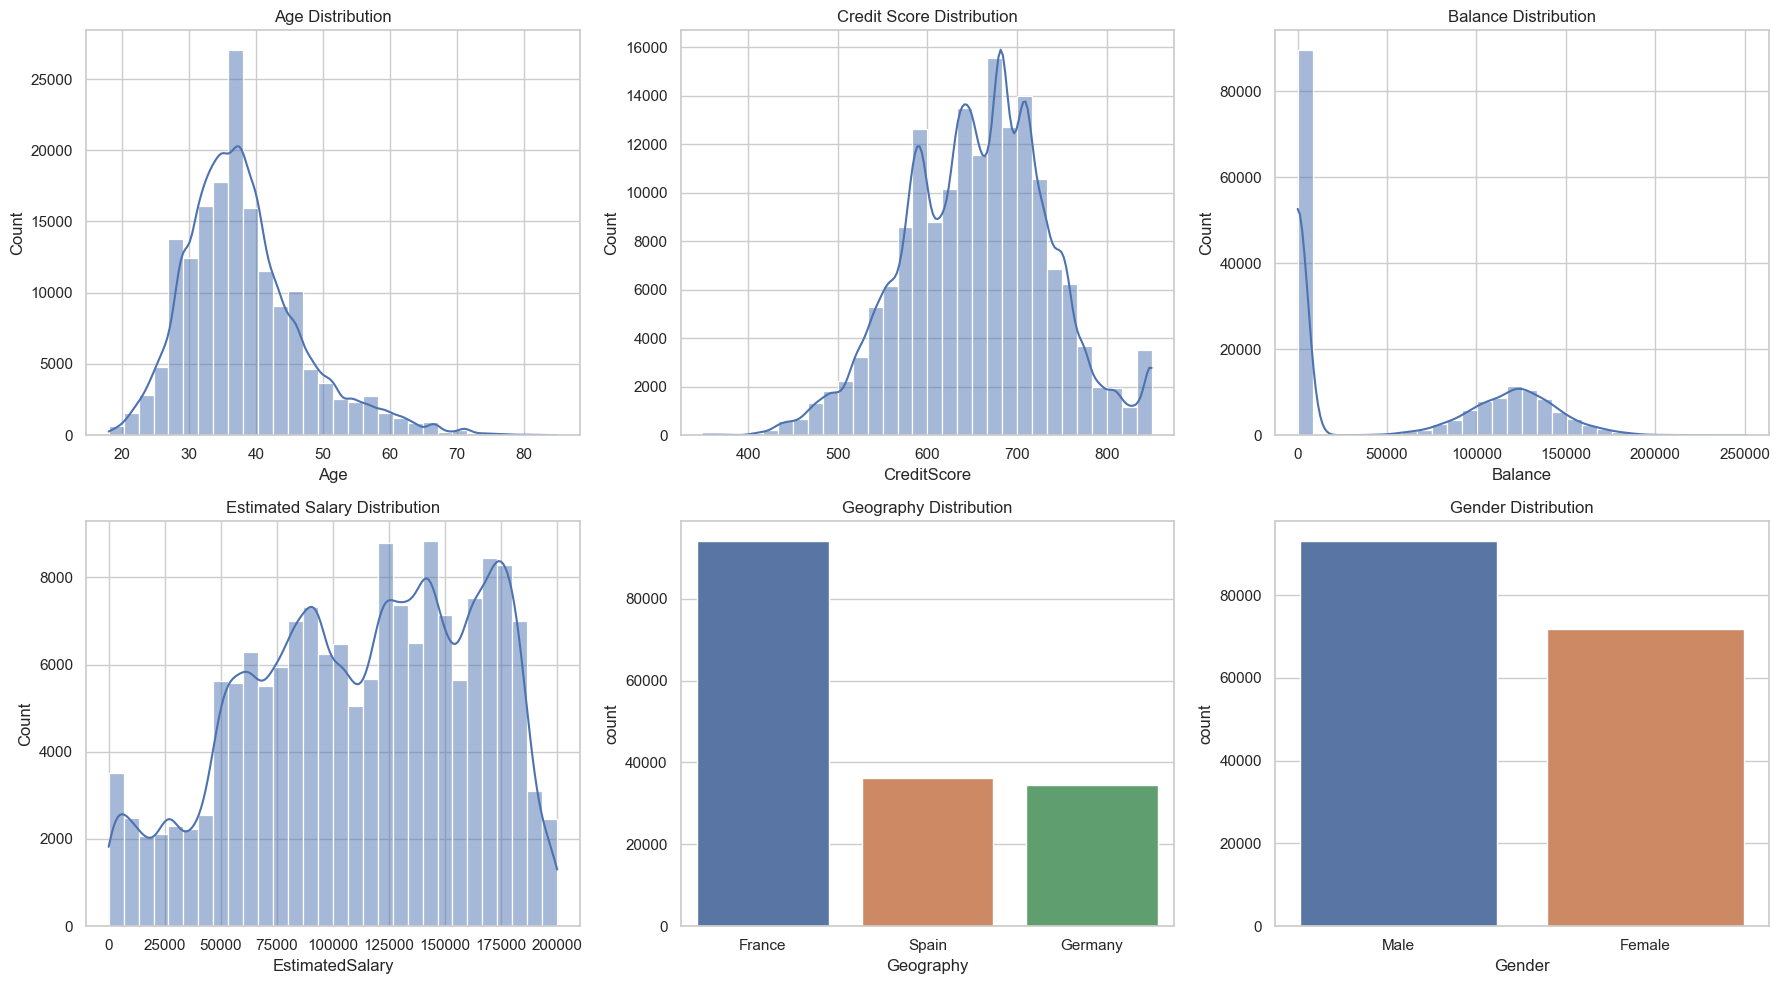

In [11]:
# Data Distribution Visualizations
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Histograms for continuous variables
sns.histplot(train_data['Age'], bins=30, kde=True, ax=axes[0,0]).set_title('Age Distribution')
sns.histplot(train_data['CreditScore'], bins=30, kde=True, ax=axes[0,1]).set_title('Credit Score Distribution')
sns.histplot(train_data['Balance'], bins=30, kde=True, ax=axes[0,2]).set_title('Balance Distribution')
sns.histplot(train_data['EstimatedSalary'], bins=30, kde=True, ax=axes[1,0]).set_title('Estimated Salary Distribution')
# Bar charts for categorical variables
sns.countplot(x='Geography', data=train_data, ax=axes[1,1]).set_title('Geography Distribution')
sns.countplot(x='Gender', data=train_data, ax=axes[1,2]).set_title('Gender Distribution')


plt.tight_layout()
plt.show()

In [12]:
from scipy import stats

# Function to print skewness and kurtosis for given columns
def print_skewness_kurtosis(data, columns):
    for column in columns:
        skewness = stats.skew(data[column])
        kurtosis = stats.kurtosis(data[column])
        print(f"The Skewness for {column} is: {skewness:.2f}")
        print(f"The Kurtosis for {column} is: {kurtosis:.2f}\n")

# List of columns to analyze
columns_to_analyze = ['Age','CreditScore', 'Balance', 'EstimatedSalary']

# Call the function with the dataframe and the list of columns
print_skewness_kurtosis(train_data, columns_to_analyze)

The Skewness for Age is: 0.96
The Kurtosis for Age is: 1.46

The Skewness for CreditScore is: -0.06
The Kurtosis for CreditScore is: -0.07

The Skewness for Balance is: 0.38
The Kurtosis for Balance is: -1.60

The Skewness for EstimatedSalary is: -0.31
The Kurtosis for EstimatedSalary is: -0.84



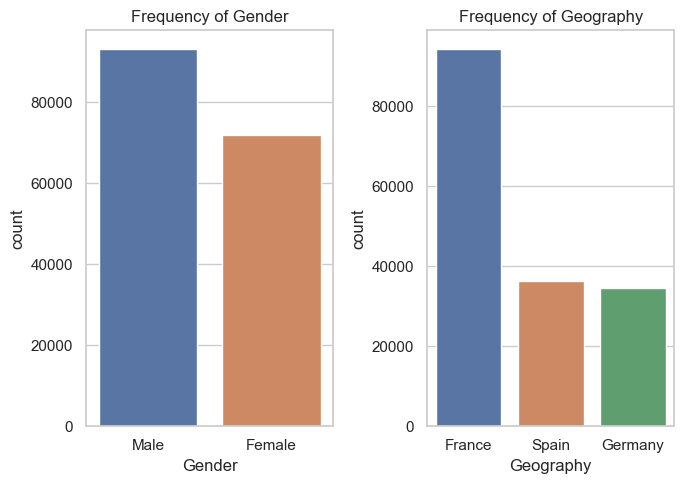

In [13]:
# Setting up the layout for the bar charts
fig, axes = plt.subplots(1, 2, figsize=(7, 5))

# Bar Chart for Categorical Variables
categorical_columns = ['Gender', 'Geography']
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=column, data=train_data, ax=ax)
    ax.set_title(f'Frequency of {column}')

plt.tight_layout()
plt.show()

# Data Distributions
In summary, 'Age' and 'Balance' are skewed towards the lower end, with some older age and higher balance values as exceptions, 'CreditScore' is fairly even with very few low values, and 'EstimatedSalary' is evenly spread out across its range with fewer low salaries. The 'Age' and 'Balance' distributions are a bit pointier and flatter, respectively, than a normal bell curve, indicating a clustering around the middle values and fewer in the extremes. 'CreditScore' and 'EstimatedSalary' have distributions that are closer to normal, with no significant presence of extreme values

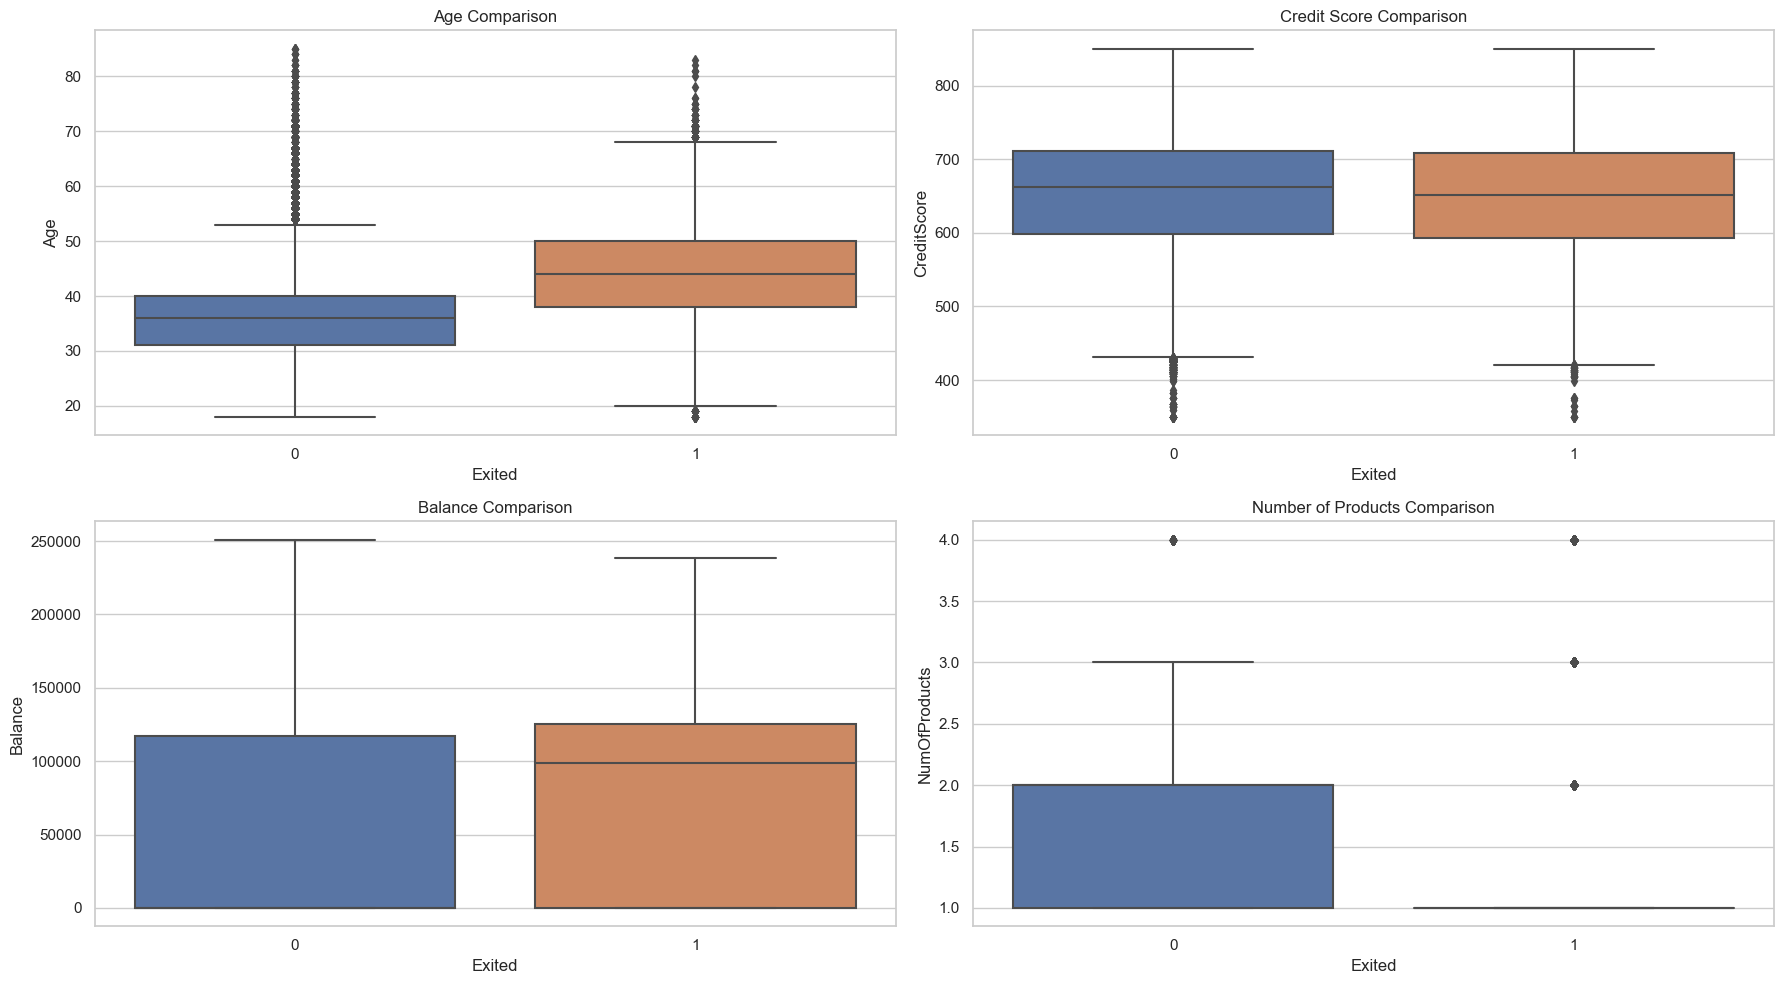

In [14]:
# Comparative Analysis: Exited vs Non-Exited Customers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Comparing Age
sns.boxplot(x='Exited', y='Age', data=train_data, ax=axes[0, 0]).set_title('Age Comparison')

# Comparing Credit Score
sns.boxplot(x='Exited', y='CreditScore', data=train_data, ax=axes[0, 1]).set_title('Credit Score Comparison')

# Comparing Balance
sns.boxplot(x='Exited', y='Balance', data=train_data, ax=axes[1, 0]).set_title('Balance Comparison')

# Comparing NumOfProducts
sns.boxplot(x='Exited', y='NumOfProducts', data=train_data, ax=axes[1, 1]).set_title('Number of Products Comparison')

plt.tight_layout()
plt.show()


# Comparative Analysis (Exited vs. Non-Exited)
Age: There is a noticeable difference in the age distribution. Exited customers tend to be older than those who did not exit.

Credit Score: Both groups have similar distributions for credit scores, suggesting that credit score may not be a strong differentiator in predicting churn.

Balance: Exited customers have a higher median balance compared to non-exited customers. This indicates that customers with higher balances are more likely to churn.

Number of Products: Customers with fewer products tend to exit more. This is evident from the lower median number of products for the exited group.


In [15]:
# Preparing contingency tables for Chi-square test
contingency_table_geo = pd.crosstab(train_data['Geography'], train_data['Exited'])
contingency_table_gender = pd.crosstab(train_data['Gender'], train_data['Exited'])

# Performing the Chi-square tests
chi2_geo, p_geo, _, _ = chi2_contingency(contingency_table_geo)
chi2_gender, p_gender, _, _ = chi2_contingency(contingency_table_gender)

chi2_geo, p_geo, chi2_gender, p_gender

(7357.901239069093, 0.0, 3538.651597368796, 0.0)

For both tests, the p-values are 0.0, which is significantly less than the typical alpha level of 0.05. This suggests that the results are statistically significant.

Geography: The statistically significant result implies that there is a strong association between a customer's geographical location and their likelihood to churn. This means that the churn rate differs significantly across different geographical regions.

Gender: Similarly, the significant result for gender indicates that the likelihood of churn is associated with the customer's gender. There is a significant difference in churn rates between different genders.

Exited
0    130103
1     34920
Name: count, dtype: int64


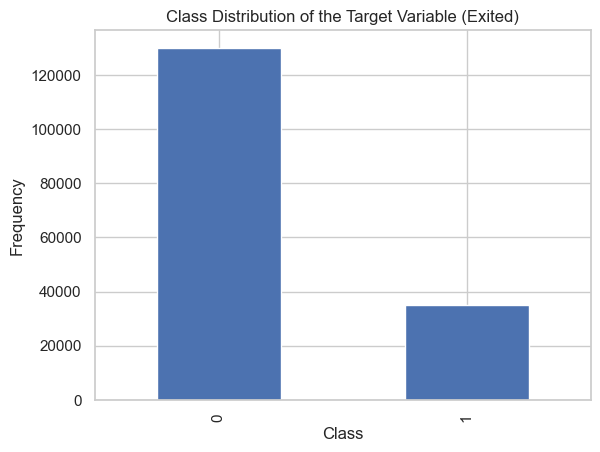

In [16]:

# Assuming churn_data_final is your DataFrame
class_counts = train_data['Exited'].value_counts()

# Printing the counts
print(class_counts)

# Plotting the counts for a visual representation
class_counts.plot(kind='bar')
plt.title('Class Distribution of the Target Variable (Exited)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

1. Non-churned (Exited = 0): 130,113 instances
2. Churned (Exited = 1): 34,921 instances
- This indicates that our dataset is imbalanced, with a significantly larger number of non-churned customers compared to churned customers. In such scenarios, model training can be biased towards the majority class, leading to poor predictive performance on the minority class, which is often the class of greater interest. Hence we will be using Resampling Techniques "SMOTE" method in our further model development.




## Model Development 

In [17]:
# Define categorical and numerical columns
cat_columns = ['Geography', 'Gender']
num_columns = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'CreditScore', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

# Separate features and target
X = train_data[cat_columns + num_columns]
y = train_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_columns),
    ('num', num_transformer, num_columns)
])

# Apply preprocessing to training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Apply preprocessing to test data
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE only to the training data
smote = SMOTE(sampling_strategy='auto', random_state=45)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)


In [18]:
columns_transformed = preprocessor.get_feature_names_out()
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=columns_transformed)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns_transformed)


In [19]:
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC(kernel='linear')
dt = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
rf = RandomForestClassifier()
#xgb_model = xgb.XGBClassifier()  
#lgb_model = lgb.LGBMClassifier()

In [20]:
knn.fit(X_train_resampled, y_train_resampled)
log.fit(X_train_resampled, y_train_resampled)
nb.fit(X_train_resampled, y_train_resampled)
svc.fit(X_train_resampled, y_train_resampled)
dt.fit(X_train_resampled, y_train_resampled)
gbc.fit(X_train_resampled, y_train_resampled)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [21]:
pred_knn = knn.predict(X_test_transformed)
pred_log = log.predict(X_test_transformed)
pred_nb = nb.predict(X_test_transformed)
pred_svc = svc.predict(X_test_transformed)
pred_dt = dt.predict(X_test_transformed)
pred_gbc = gbc.predict(X_test_transformed)
pred_rf = rf.predict(X_test_transformed)




In [29]:
f1_knn = f1_score(y_test, pred_knn)
f1_log = f1_score(y_test, pred_log)
f1_nb = f1_score(y_test, pred_nb)
f1_svc = f1_score(y_test, pred_svc)
f1_dt = f1_score(y_test, pred_dt)
f1_gbc = f1_score(y_test, pred_gbc)
f1_rf = f1_score(y_test, pred_rf)
#f1_xgb = f1_score(y_test, pred_xgb)
#f1_lgb = f1_score(y_test, pred_lgb)

print(f"F1 Score (KNN): {f1_knn}")
print(f"F1 Score (Logistic Regression): {f1_log}")
print(f"F1 Score (Naive Bayes): {f1_nb}")
print(f"F1 Score (SVC): {f1_svc}")
print(f"F1 Score (Decision Tree): {f1_dt}")
print(f"F1 Score (Gradient Boosting): {f1_gbc}")
print(f"F1 Score (Radndom Forest): {f1_rf}")
#print(f"F1 Score (XGBoost): {f1_xgb}")
#print(f"F1 Score (LightBM): {f1_lgb}")


F1 Score (KNN): 0.56886797737075
F1 Score (Logistic Regression): 0.5591629813396614
F1 Score (Naive Bayes): 0.5414715539049464
F1 Score (SVC): 0.5667018264586687
F1 Score (Decision Tree): 0.5306094746844034
F1 Score (Gradient Boosting): 0.6509287444865504
F1 Score (Radndom Forest): 0.6374530241792525


In [32]:
ac_1 = accuracy_score(y_test, pred_knn)
print(ac_1)

0.7667929101651265


In [30]:
p1_knn = precision_score(y_test, pred_knn)
p2_log = precision_score(y_test, pred_log)
p3_nb = precision_score(y_test, pred_nb)
p4_svc = precision_score(y_test, pred_svc)
p5_dt = precision_score(y_test, pred_dt)
p6_gbc = precision_score(y_test, pred_gbc)
p7_rf = precision_score(y_test, pred_rf)
#p8_xgb = f1_score(y_test, pred_xgb)
#p9_lgb = f1_score(y_test, pred_lgb)

print(f"Precision Score (KNN): {f1_knn}")
print(f"Precision Score (Logistic Regression): {f1_log}")
print(f"Precision Score (Naive Bayes): {f1_nb}")
print(f"Precision Score (SVC): {f1_svc}")
print(f"Precision Score(Decision Tree): {f1_dt}")
print(f"Precision Score (Gradient Boosting): {f1_gbc}")
print(f"Precision Score (Radndom Forest): {f1_rf}")
#print(f"Precision Score(XGBoost): {f1_xgb}")
#print(f"Precision Score (LightBM): {f1_lgb}")

Precision Score (KNN): 0.56886797737075
Precision Score (Logistic Regression): 0.5591629813396614
Precision Score (Naive Bayes): 0.5414715539049464
Precision Score (SVC): 0.5667018264586687
Precision Score(Decision Tree): 0.5306094746844034
Precision Score (Gradient Boosting): 0.6509287444865504
Precision Score (Radndom Forest): 0.6374530241792525


In [31]:
r1_knn = recall_score(y_test, pred_knn)
r2_log = recall_score(y_test, pred_log)
r3_nb = recall_score(y_test, pred_nb)
r4_svc = recall_score(y_test, pred_svc)
r5_dt = recall_score(y_test, pred_dt)
r6_gbc = recall_score(y_test, pred_gbc)
r7_rf = recall_score(y_test, pred_rf)
#p8_xgb = recall_score(y_test, pred_xgb)
#p9_lgb = recall_score(y_test, pred_lgb)

print(f"Recall Score (KNN): {f1_knn}")
print(f"Recall Score (Logistic Regression): {f1_log}")
print(f"Recall Score (Naive Bayes): {f1_nb}")
print(f"Recall Score (SVC): {f1_svc}")
print(f"Recall Score(Decision Tree): {f1_dt}")
print(f"Recall Score (Gradient Boosting): {f1_gbc}")
print(f"Recall Score (Radndom Forest): {f1_rf}")
#print(f"Recall Score (XGBoost): {f1_xgb}")
#print(f"Recall Score (LightBM): {f1_lgb}")

Recall Score (KNN): 0.56886797737075
Recall Score (Logistic Regression): 0.5591629813396614
Recall Score (Naive Bayes): 0.5414715539049464
Recall Score (SVC): 0.5667018264586687
Recall Score(Decision Tree): 0.5306094746844034
Recall Score (Gradient Boosting): 0.6509287444865504
Recall Score (Radndom Forest): 0.6374530241792525
